In [205]:
import yfinance as yf


In [206]:
import pandas as pd


In [207]:
import matplotlib.pyplot as plt


In [208]:
# Fetch data


In [209]:
stock = yf.Ticker("SHRIRAMFIN.NS")
data = stock.history(period="1y")


In [210]:
# Calculate SMAs


In [211]:
data["SMA10"] = data["Close"].rolling(window=10).mean()
data["SMA50"] = data["Close"].rolling(window=50).mean()


In [212]:
# Generate Signals


In [213]:
data["Signal"] = 0
data.loc[data["SMA10"] > data["SMA50"], "Signal"] = 1
data.loc[data["SMA10"] < data["SMA50"], "Signal"] = -1


In [214]:
# Plot

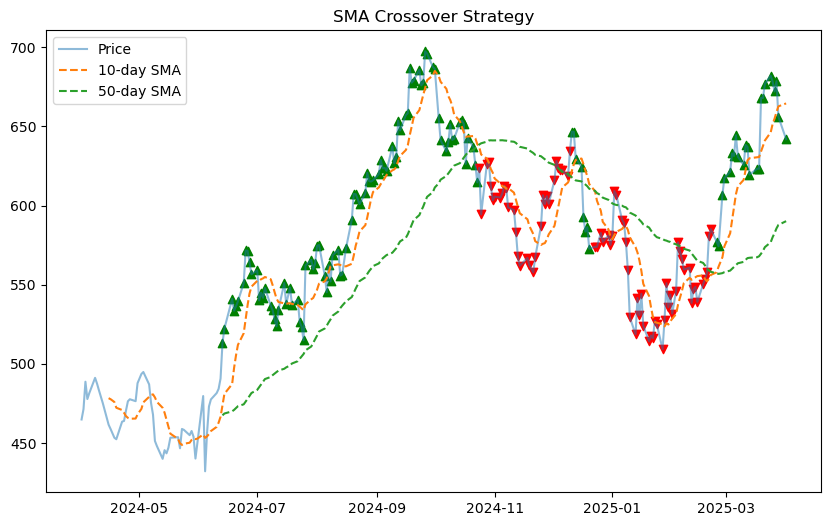

In [215]:
plt.figure(figsize=(10, 6))
plt.plot(data["Close"], label="Price", alpha=0.5)
plt.plot(data["SMA10"], label="10-day SMA", linestyle="--")
plt.plot(data["SMA50"], label="50-day SMA", linestyle="--")
plt.title("SMA Crossover Strategy")
plt.legend()
buy_signals = data[data["Signal"] == 1]
sell_signals = data[data["Signal"] == -1]
plt.scatter(buy_signals.index, buy_signals["Close"], marker="^", color="g", label="Buy")
plt.scatter(sell_signals.index, sell_signals["Close"], marker="v", color="r", label="Sell")
plt.show()


In [216]:
# Backtest


In [217]:
initial_cash = 100000
position = 0
cash = initial_cash


In [218]:
for i in range(1, len(data)):
    if data["Signal"].iloc[i] == 1 and position == 0:
        position = cash // data["Close"].iloc[i]
        cash -= position * data["Close"].iloc[i]
        print(f"Buy {position} shares at ₹{data['Close'].iloc[i]:.2f}")
    elif data["Signal"].iloc[i] == -1 and position > 0:
        cash += position * data["Close"].iloc[i]
        print(f"Sell {position} shares at ₹{data['Close'].iloc[i]:.2f}")
        position = 0


Buy 194.0 shares at ₹513.18
Sell 194.0 shares at ₹623.71
Buy 187.0 shares at ₹646.63
Sell 187.0 shares at ₹573.90
Buy 186.0 shares at ₹577.20


In [220]:
final_value = cash + (position * data["Close"].iloc[-1])
print(f"Initial Cash: ₹{initial_cash:.2f}")
print(f"Final Value: ₹{final_value:.2f}")
print(f"Profit/Loss: ₹{final_value - initial_cash:.2f}")

Initial Cash: ₹100000.00
Final Value: ₹119874.96
Profit/Loss: ₹19874.96
